In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# CUTTING WAVELENGTH RANGE 3847 - 6700

In [2]:
data = pd.read_csv('data olah.csv')
data = data.drop('Unnamed: 0', axis = 1)

In [3]:
data.drop(data.columns[2410:3579], axis=1, inplace=True)
data.head(5)

,3847.6904,3848.5764,3849.4626,3850.349,3851.2358,3852.1228,3853.0098,3853.897,3854.7847,3855.6724,...,6688.059,6689.5996,6691.14,6692.6807,6694.222,6695.7637,6697.3057,6698.8477,6700.3906,wd_subclass
0,1.401641,-15.924921,12.17053,43.935257,13.352866,-0.958922,30.751305,17.331050,11.543040,-10.870653,...,4.525449,5.095497,4.234928,4.794764,5.965820,4.234310,4.073895,6.162295,4.391887,DA
1,0.340451,39.321850,96.95255,59.952780,49.579453,2.106772,30.853228,68.127846,38.738255,30.705740,...,8.622414,10.219061,9.293289,8.402941,7.801483,7.767938,7.887807,9.083275,10.359595,DA
2,90.410576,72.741806,80.37630,81.740350,95.025150,96.718460,59.218792,91.619460,76.982025,79.829170,...,32.816840,32.305386,30.800816,35.627293,34.485073,33.750920,30.536829,30.124290,32.247017,DA
3,82.717730,104.292206,87.98204,97.919210,95.674380,96.730340,121.290480,92.193184,115.548490,109.607440,...,23.460505,22.019167,23.856443,22.434275,23.262499,24.345755,23.040964,21.792454,21.794620,DA
4,-0.785483,2.712233,16.83574,1.124182,4.654962,7.689255,4.296149,7.754487,2.004906,8.411777,...,7.451107,8.597365,6.658686,5.471281,4.953662,4.457098,4.703722,5.737448,4.277687,DA


In [4]:
dadaz = [
    'DA' 
]

data['wd_subclass'] = np.where(data['wd_subclass'].isin(dadaz), 1, 0)

In [5]:
data['wd_subclass'].value_counts(normalize=True)*100

1    90.148686
0     9.851314
Name: wd_subclass, dtype: float64

# Model

In [6]:
#train test set

from sklearn.model_selection import train_test_split

X = data.drop('wd_subclass', axis=1)
y = data['wd_subclass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((11783, 2410), (2946, 2410))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=400, max_features = 100, oob_score = True, class_weight = 'balanced')
rfc.fit(X_train, y_train)

arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
#df_all_features.head(30)
df_all_features

In [19]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

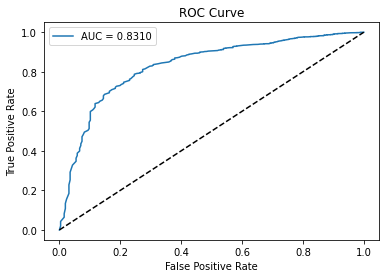

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

[0.995      0.99833333 0.89666667 ... 0.97833333 0.66833333 0.98833333]


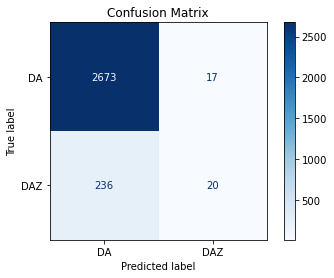

In [21]:
y_pred = []
for i in y_pred_proba:
    if i > 0.5 :
        y_pred.append(1)
    elif i <= 0.5 :
        y_pred.append(0)
print (y_pred_proba)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['DA','DAZ'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()